In [22]:
from astropy.table import Table
from astroquery.gaia import Gaia
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np

In [24]:
%matplotlib inline

In [26]:
plotpar = {
           'axes.labelsize': 17,
           'axes.titlesize' : 17,
           'font.size': 10,
           'legend.fontsize': 17,
           'xtick.labelsize': 17,
           'ytick.labelsize': 17,
           'text.usetex': False
}
plt.rcParams.update(plotpar)

# Querying stars within 100 parsecs from the Gaia Archive

In [6]:
query = "SELECT gaia.phot_g_mean_mag,gaia.phot_bp_mean_mag," \
        "gaia.phot_rp_mean_mag,gaia.parallax " \
        "FROM gaiadr3.gaia_source AS gaia " \
        "WHERE gaia.parallax_over_error > 50 AND " \
        "gaia.phot_g_mean_flux_over_error > 50 AND " \
        "gaia.phot_rp_mean_flux_over_error > 50 AND " \
        "gaia.phot_bp_mean_flux_over_error > 50 AND gaia.parallax > 10"

j = Gaia.launch_job_async(query = query, verbose=True)
gaiadr3 = j.get_results()

Launched query: 'SELECT gaia.phot_g_mean_mag,gaia.phot_bp_mean_mag,gaia.phot_rp_mean_mag,gaia.parallax FROM gaiadr3.gaia_source AS gaia WHERE gaia.parallax_over_error > 50 AND gaia.phot_g_mean_flux_over_error > 50 AND gaia.phot_rp_mean_flux_over_error > 50 AND gaia.phot_bp_mean_flux_over_error > 50 AND gaia.parallax > 10'
------>https
host = gea.esac.esa.int:443
context = /tap-server/tap/async
Content-type = application/x-www-form-urlencoded
303 303
[('Date', 'Fri, 16 Aug 2024 21:09:23 GMT'), ('Server', 'Apache/2.4.6 (CentOS) OpenSSL/1.0.2k-fips mod_jk/1.2.43'), ('Cache-Control', 'no-cache, no-store, max-age=0, must-revalidate'), ('Pragma', 'no-cache'), ('Expires', '0'), ('X-XSS-Protection', '1; mode=block'), ('X-Frame-Options', 'SAMEORIGIN'), ('X-Content-Type-Options', 'nosniff'), ('Set-Cookie', 'JSESSIONID=F4062363059828CAB7CF1C7DB1A2103C; Path=/tap-server; Secure; HttpOnly'), ('Location', 'https://gea.esac.esa.int/tap-server/tap/async/1723842563129O'), ('Transfer-Encoding', 'chunked

In [28]:
gaiadr3

phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,parallax
mag,mag,mag,mas
float32,float32,float32,float64
13.470652,14.585335,12.419784,13.398257319108815
14.576204,16.034027,13.356538,18.395337998280908
13.436164,14.93393,12.241962,25.8932028451182
6.22464,6.3795276,5.939466,19.588654431566606
16.20053,17.969446,14.933993,15.93176044663437
15.446747,16.958754,14.244241,10.368954647575999
...,...,...,...
9.989574,10.567817,9.27249,18.965919041156457


In [38]:
def calculate_absMag(gaia_mag, parallax):
    abs_mag = gaia_mag - 5 * (np.log10(1000/parallax) - 1)  
    return abs_mag

In [40]:
gaiadr3['abs_mag'] = calculate_absMag(gaiadr3['phot_g_mean_mag'], gaiadr3['parallax'])

In [42]:
gaiadr3['abs_mag']

9.105893198294295
10.899743160039385
10.502092770125202
2.6846629166008547
12.21184793671798
10.52542170084934
8.765523984086588
10.195131246435107
9.989907420050944
...
8.171154131483311


Text(0, 0.5, 'abs magnitude')

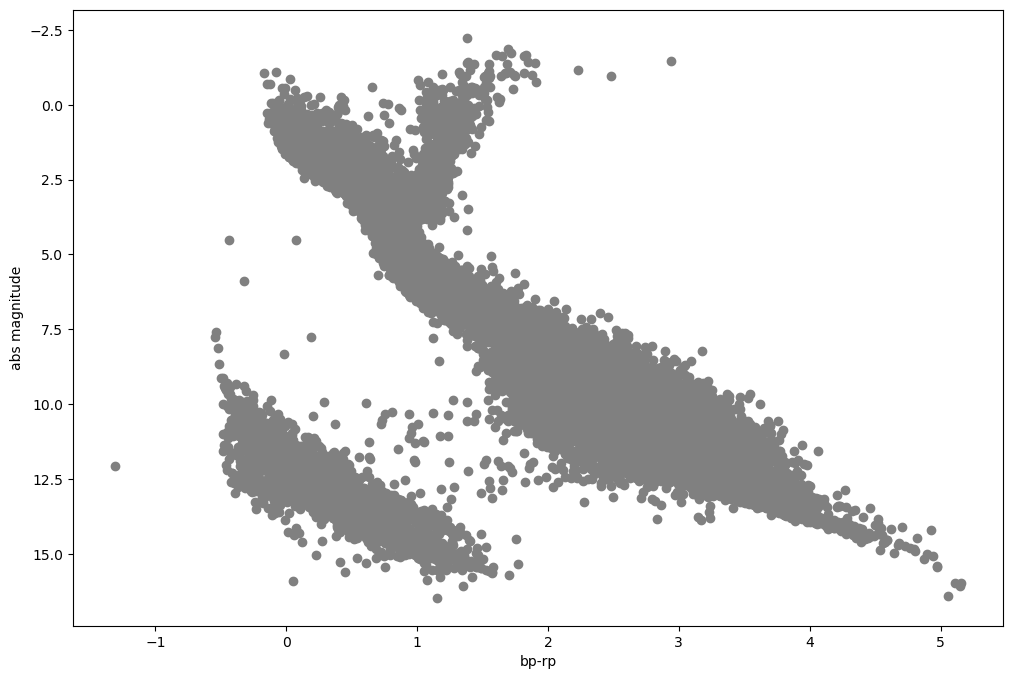

In [16]:
plt.subplots(figsize = (12, 8))
plt.scatter(gaiadr3['phot_bp_mean_mag'] - gaiadr3['phot_rp_mean_mag'], gaiadr3['abs_mag'], zorder= 0, color = 'gray')
plt.gca().invert_yaxis()
plt.xlabel('bp-rp')
plt.ylabel('abs magnitude')

In [30]:
tbl = Table.read('../../catalogs/Combined/fast_single_rots_by_fourflags.vot')
tbl

main_01_oid,main_non_rep_oid,source_id,Mass,Per,Rad,ra,dec,ruwe,reference,logAge,SpType,Lstar,rv_amplitude_robust,ipd_frac_multi_peak,parallax,pm,pmra,pmdec,phot_g_mean_mag,bp_rp,radial_velocity,radial_velocity_error,ruwe_2,ruwe_f,ipd_f,rv_robust_old_bin,rv_amp_f,abs_Mag,reMass,parallax_error,pmra_error,pmdec_error,re_v_z,re_v_z_error,age_est,is_in_wds
,,,solMass,d,solRad,deg,deg,,,[yr],,0.01 solLum,km / s,,mas,mas / yr,mas / yr,mas / yr,mag,mag,km / s,km / s,,,,,,,,mas,mas / yr,mas / yr,,,,
int32,int32,int64,float32,float64,float32,float64,float64,float64,object,float32,str6,float32,float32,int16,float64,float32,float64,float64,float32,float32,float32,float32,float32,int64,int64,int64,int64,float64,float64,float32,float32,float32,float64,float64,float64,int64
165,262,700357227214999296,0.37,0.37,0.39,141.21117,30.69285,1.191,Newton17,--,,--,43.488373,0,31.48790021209892,198.0609,-100.6276142794498,-170.59368263173135,12.296038,2.6087093,16.319973,3.4797094,1.1910821,0,0,1,0,9.786756176131949,0.39,0.0282501,0.025457522,0.021215247,-13.752346760578174,1.7385040745822544,0.5100784913607785,0
233,509,3241952369992171904,0.68,4.44,0.71,77.83086,7.90891,1.152999997138977,Kounkel,8.807,,--,2.6562538,0,17.427507387186957,57.201317,57.14144078463892,-2.6165742404915218,10.759151,1.473258,43.98511,0.29879838,1.1525434,0,0,1,0,6.965327836228763,0.69,0.018653851,0.021666093,0.016247697,5.346376698527262,0.04182907835659299,0.12072480842922366,0
240,643,5335418042562387456,0.64,3.57,0.67,176.78129,-60.35621,0.9670000076293945,Kounkel,8.81,,--,10.464988,0,11.13612812342512,26.032045,14.210741961725846,-21.811056704605875,12.3362665,1.6679459,15.962098,0.7759046,0.9674747,0,0,1,0,7.569937612348227,0.64,0.011422299,0.011681804,0.010724976,-18.45119149723714,0.6874342349353727,0.8926638698568854,0
245,723,1966340348578305280,0.65,3.45,0.68,323.10276,41.0578,1.25,Kounkel,8.75,,--,16.97768,0,8.296332150298477,63.557606,53.07961933810516,34.958878123515845,12.991943,1.836935,-17.231949,0.9290446,1.2501196,0,0,1,0,7.5863740146563385,0.64,0.014329556,0.012352283,0.012998461,3.705165726064063,0.6116558527827002,0.0600852524504088,0
259,785,6080888605477526528,0.54,4.78,0.55,199.94226,-50.49654,1.1490000486373901,Kounkel,9.09,,--,101.213036,0,13.943956545414588,23.156023,21.544516535677637,-8.48735455398944,13.0828495,2.3681087,16.736225,6.6152864,1.1486684,0,0,1,0,8.804779605963269,0.5,0.01633804,0.013974434,0.011650917,-14.86772501228027,5.074780210234196,0.26704824483206424,0
278,1036,1996239368272403200,--,1.16,0.69,345.56327,53.08383,1.034000039100647,Kounkel,8.75,,--,71.278915,0,9.835202103500896,83.55814,77.99814553468089,29.970861773232798,12.575913,1.6710882,-10.134175,35.377148,1.0341264,0,0,1,0,7.539829872567225,0.64,0.012023443,0.011227194,0.010559613,0.45442592343601995,28.278415262975404,0.04946484991304285,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,1699,2100076868439605632,0.24,1.96,0.24,286.21191,39.16256,1.053,Wright,--,,--,58.745567,0,12.051895449259412,40.622368,39.642943869740286,8.866448653200178,13.24949,2.1043577,-4.4677143,2.835519,1.0525161,0,0,1,0,8.654766561707216,0.52,0.0097791795,0.010087103,0.011569172,-0.15743181277095725,1.8018152923621105,0.010000000000000005,0


In [19]:
np.min(tbl['Mass'])

0.12

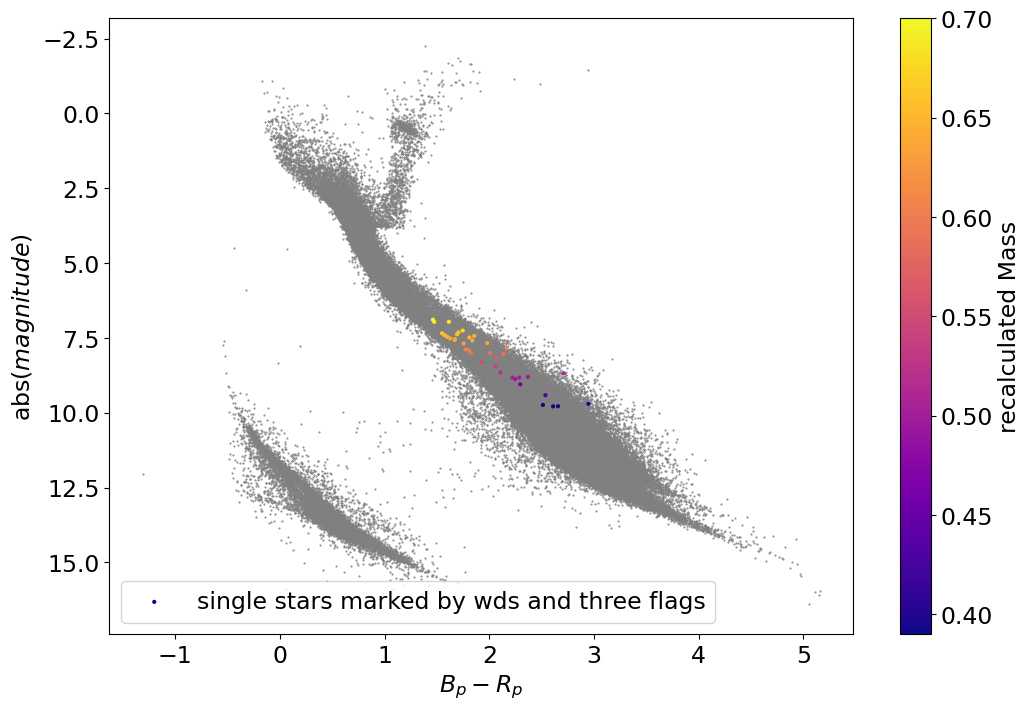

In [44]:
plt.subplots(figsize = (12, 8))
plt.scatter(gaiadr3['phot_bp_mean_mag'] - gaiadr3['phot_rp_mean_mag'], gaiadr3['abs_mag'], s = 0.25, zorder= 0, color = 'gray')
plt.scatter(tbl['bp_rp'], tbl['abs_Mag'], s = 4, label = 'single stars marked by wds and three flags', c = tbl['reMass'], cmap = 'plasma')

plt.gca().invert_yaxis()
plt.xlabel(r'$B_p - R_p$')
plt.ylabel(r'$\mathrm{abs}(magnitude)$')
plt.colorbar(label = 'recalculated Mass')
plt.legend()

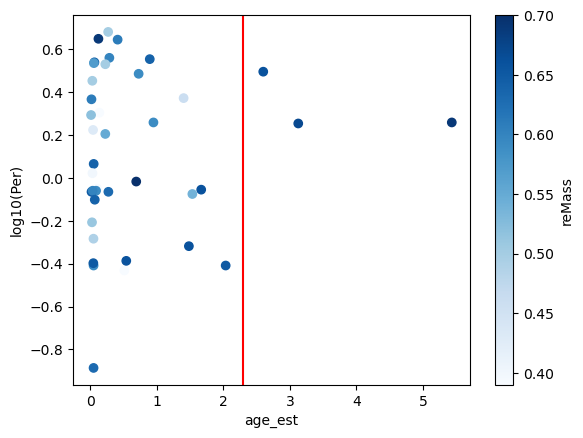

In [62]:
plt.scatter(tbl['age_est'], np.log10(tbl['Per']), c =tbl['reMass'], cmap = 'Blues')
plt.colorbar(label = 'reMass')
plt.xlabel('age_est')
plt.ylabel('log10(Per)')
plt.axvline(x = 2.3, color ='red')

In [26]:
mask_outlier = tbl['bp_rp'] > 2.8
# tbl[~outliers & ~mask_outlier].write('../../catalogs/Combined/fast_single_rots_by_fourflags_remov_outliers.vot', format = 'votable')

Text(0.5, 1.0, 'Zoomed-In, Marked Outliers')

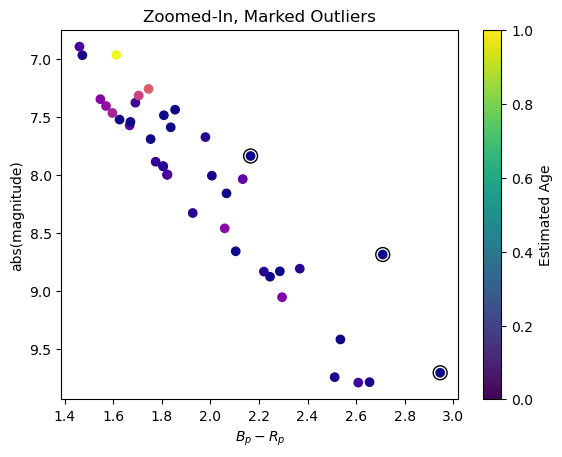

In [122]:
plt.scatter(tbl['bp_rp'], tbl['abs_Mag'], c = tbl['age_est'], cmap = 'plasma')

# Calculate residuals
y_points = poly(tbl['bp_rp'])
residuals = tbl['abs_Mag'] - y_points

# a threshold for outliers 
threshold = 2 * np.std(residuals)
outliers = np.abs(residuals) > threshold

# Plot outliers
plt.scatter(tbl['bp_rp'][outliers | mask_outlier], tbl['abs_Mag'][outliers | mask_outlier], edgecolors='black', facecolors='none', s=100, label='Outliers')


plt.gca().invert_yaxis()
plt.colorbar(label = 'Estimated Age')
# plt.axvline(x = 2.8, color = 'red')
plt.xlabel(r'$B_p- R_p$')
plt.ylabel('abs(magnitude)')
plt.title('Zoomed-In, Marked Outliers')

Text(0.5, 1.0, 'Zoomed-In, Marked Outliers')

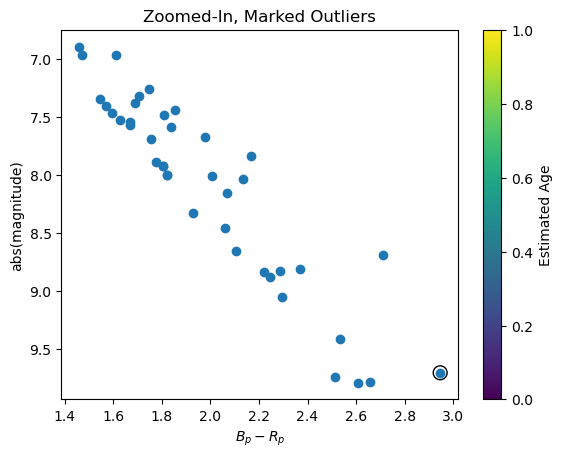

In [124]:
plt.scatter(tbl['bp_rp'], tbl['abs_Mag'])
plt.scatter(tbl['bp_rp'][mask_outlier], tbl['abs_Mag'][mask_outlier], edgecolors='black', facecolors='none', s=100, label='Outliers')


plt.gca().invert_yaxis()
plt.colorbar(label = 'Estimated Age')
# plt.axvline(x = 2.8, color = 'red')
plt.xlabel(r'$B_p- R_p$')
plt.ylabel('abs(magnitude)')
plt.title('Zoomed-In, Marked Outliers')

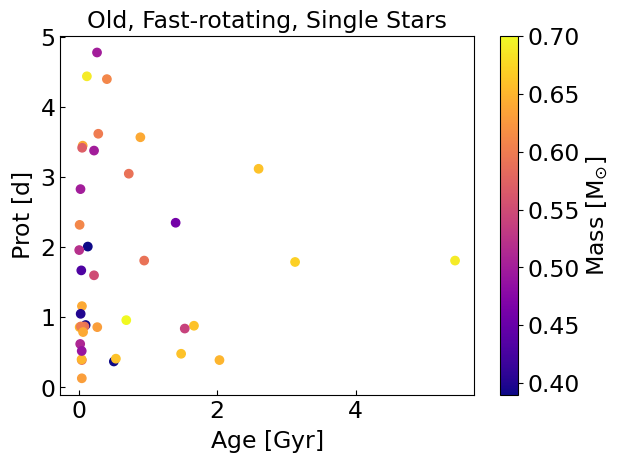

In [356]:
plt.scatter(tbl['age_est'], tbl['Per'], c= tbl['reMass'], cmap = 'plasma', label='Mass < 0.4')
plt.xlabel(r'$\rm{Age}\ [Gyr]$')
plt.ylabel(r'$\rm{Prot \ [d]}$')
plt.colorbar(label = r'$\rm{Mass}\ [M_{\odot}]$')
plt.title('Old, Fast-rotating, Single Stars')
plt.tight_layout()
plt.tick_params(direction='in')
# plt.savefig('../../photos/report22.png')
plt.show()


In [34]:
df= Table.read('../../catalogs/Combined/fast_single_rots_by_fourflags_remov_outliers.vot')
df

main_01_oid,main_non_rep_oid,source_id,Mass,Per,Rad,ra,dec,ruwe,reference,logAge,SpType,Lstar,rv_amplitude_robust,ipd_frac_multi_peak,parallax,pm,pmra,pmdec,phot_g_mean_mag,bp_rp,radial_velocity,radial_velocity_error,ruwe_2,ruwe_f,ipd_f,rv_robust_old_bin,rv_amp_f,abs_Mag,reMass,parallax_error,pmra_error,pmdec_error,re_v_z,re_v_z_error,age_est,is_in_wds
,,,solMass,d,solRad,deg,deg,,,[yr],,0.01 solLum,km / s,,mas,mas / yr,mas / yr,mas / yr,mag,mag,km / s,km / s,,,,,,,,mas,mas / yr,mas / yr,,,,
int32,int32,int64,float32,float64,float32,float64,float64,float64,object,float32,str6,float32,float32,int16,float64,float32,float64,float64,float32,float32,float32,float32,float32,int64,int64,int64,int64,float64,float64,float32,float32,float32,float64,float64,float64,int64
165,262,700357227214999296,0.37,0.37,0.39,141.21117,30.69285,1.191,Newton17,--,,--,43.488373,0,31.48790021209892,198.0609,-100.6276142794498,-170.59368263173135,12.296038,2.6087093,16.319973,3.4797094,1.1910821,0,0,1,0,9.786756176131949,0.39,0.0282501,0.025457522,0.021215247,-13.752346760578174,1.7385040745822544,0.5100784913607785,0
233,509,3241952369992171904,0.68,4.44,0.71,77.83086,7.90891,1.152999997138977,Kounkel,8.807,,--,2.6562538,0,17.427507387186957,57.201317,57.14144078463892,-2.6165742404915218,10.759151,1.473258,43.98511,0.29879838,1.1525434,0,0,1,0,6.965327836228763,0.69,0.018653851,0.021666093,0.016247697,5.346376698527262,0.04182907835659299,0.12072480842922366,0
240,643,5335418042562387456,0.64,3.57,0.67,176.78129,-60.35621,0.9670000076293945,Kounkel,8.81,,--,10.464988,0,11.13612812342512,26.032045,14.210741961725846,-21.811056704605875,12.3362665,1.6679459,15.962098,0.7759046,0.9674747,0,0,1,0,7.569937612348227,0.64,0.011422299,0.011681804,0.010724976,-18.45119149723714,0.6874342349353727,0.8926638698568854,0
245,723,1966340348578305280,0.65,3.45,0.68,323.10276,41.0578,1.25,Kounkel,8.75,,--,16.97768,0,8.296332150298477,63.557606,53.07961933810516,34.958878123515845,12.991943,1.836935,-17.231949,0.9290446,1.2501196,0,0,1,0,7.5863740146563385,0.64,0.014329556,0.012352283,0.012998461,3.705165726064063,0.6116558527827002,0.0600852524504088,0
259,785,6080888605477526528,0.54,4.78,0.55,199.94226,-50.49654,1.1490000486373901,Kounkel,9.09,,--,101.213036,0,13.943956545414588,23.156023,21.544516535677637,-8.48735455398944,13.0828495,2.3681087,16.736225,6.6152864,1.1486684,0,0,1,0,8.804779605963269,0.5,0.01633804,0.013974434,0.011650917,-14.86772501228027,5.074780210234196,0.26704824483206424,0
278,1036,1996239368272403200,--,1.16,0.69,345.56327,53.08383,1.034000039100647,Kounkel,8.75,,--,71.278915,0,9.835202103500896,83.55814,77.99814553468089,29.970861773232798,12.575913,1.6710882,-10.134175,35.377148,1.0341264,0,0,1,0,7.539829872567225,0.64,0.012023443,0.011227194,0.010559613,0.45442592343601995,28.278415262975404,0.04946484991304285,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,1699,2100076868439605632,0.24,1.96,0.24,286.21191,39.16256,1.053,Wright,--,,--,58.745567,0,12.051895449259412,40.622368,39.642943869740286,8.866448653200178,13.24949,2.1043577,-4.4677143,2.835519,1.0525161,0,0,1,0,8.654766561707216,0.52,0.0097791795,0.010087103,0.011569172,-0.15743181277095725,1.8018152923621105,0.010000000000000005,0


Text(0.5, 1.0, 'Removed Outliers')

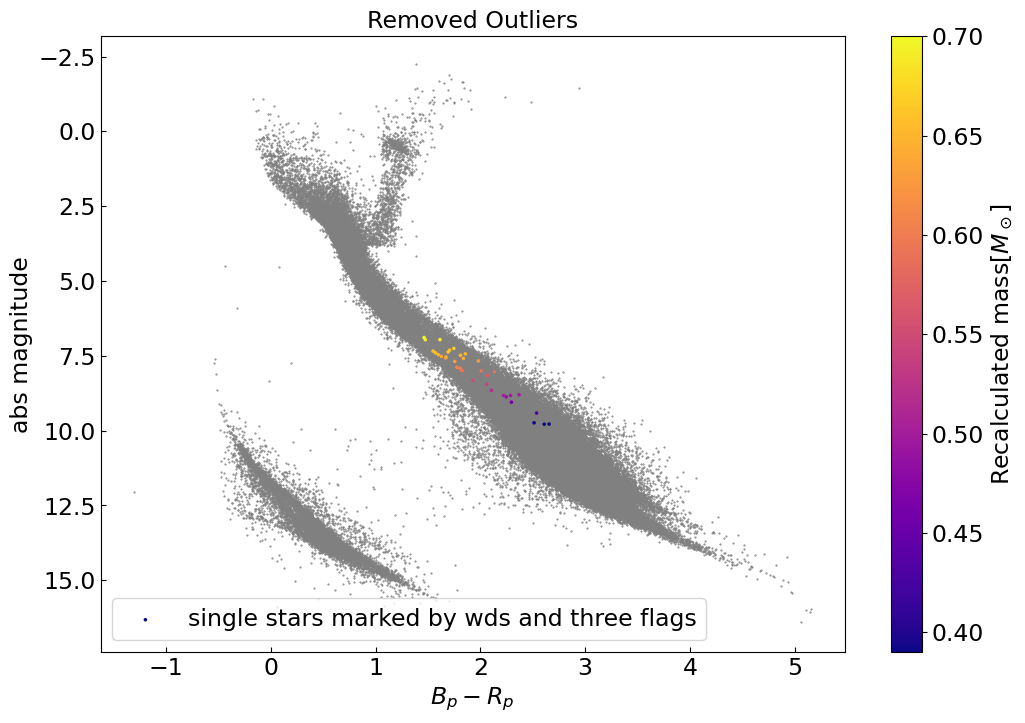

In [48]:
plt.subplots(figsize = (12, 8))
plt.scatter(gaiadr3['phot_bp_mean_mag'] - gaiadr3['phot_rp_mean_mag'], gaiadr3['abs_mag'], s = 0.25, zorder= 0, color = 'gray')
plt.scatter(df['bp_rp'], df['abs_Mag'], s = 2.5, label = 'single stars marked by wds and three flags', c = df['reMass'], cmap = 'plasma')

plt.colorbar(label = r'$\mathrm{Recalculated\ mass} [M_\odot]$')
plt.gca().invert_yaxis()
plt.xlabel(r'$B_p-R_p$')
plt.ylabel('abs magnitude')
plt.legend()
plt.tick_params(direction = 'in')
plt.title('Removed Outliers')

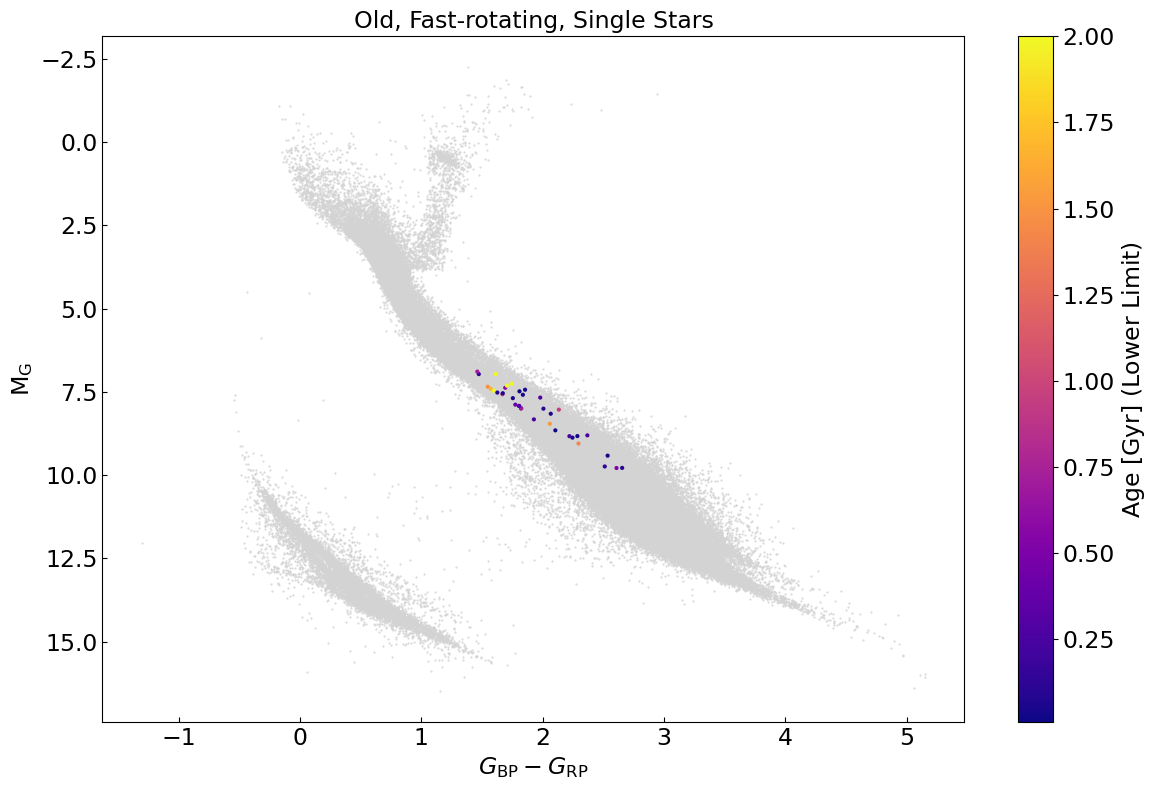

In [56]:
plt.subplots(figsize = (12, 8))
plt.scatter(gaiadr3['phot_bp_mean_mag'] - gaiadr3['phot_rp_mean_mag'], gaiadr3['abs_mag'], s = 0.25, zorder= 0, color = 'lightgray')
plt.scatter(df['bp_rp'], df['abs_Mag'], s = 4, c = df['age_est'], cmap = 'plasma', vmax= 2)

plt.colorbar(label = r'${\rm Age}\ [\rm{Gyr}]\  \rm{(Lower\ Limit)}$')
plt.gca().invert_yaxis()
plt.xlabel(r'$G_{\rm BP}-G_{\rm RP}$') 
plt.ylabel(r'${\rm M}_{\rm G}$')
plt.tick_params(direction='in')
plt.title('Old, Fast-rotating, Single Stars')
plt.tight_layout()

plt.savefig('../../plots/presentation/fast_old_singles.png')

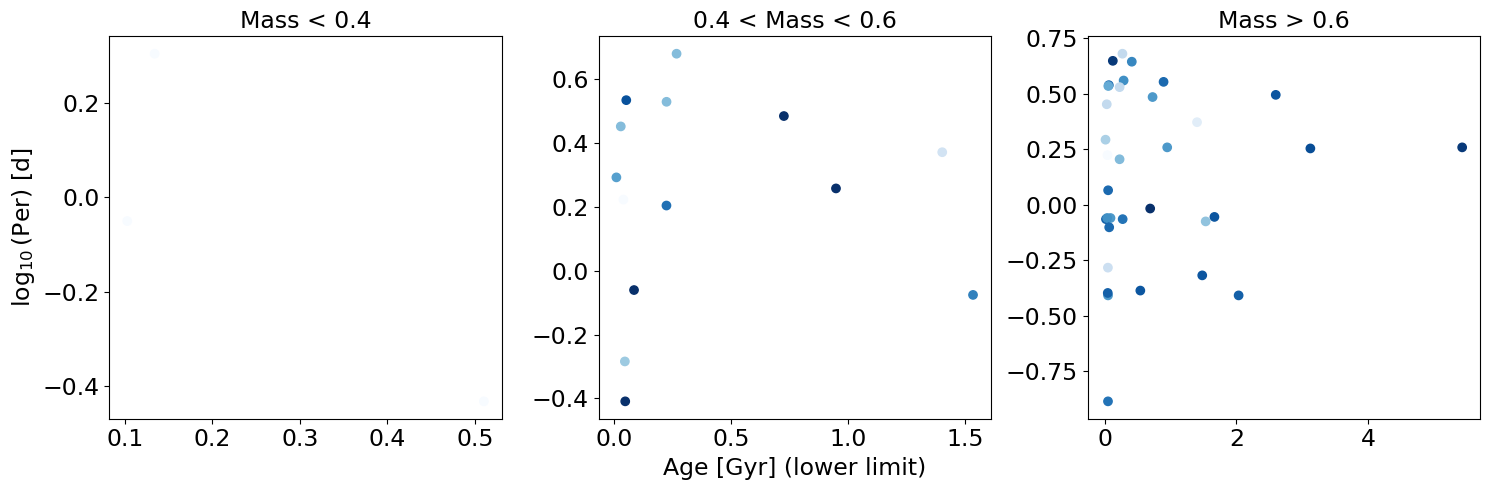

In [94]:
mask_mass1 = df['reMass'] < 0.4
mask_mass2 = (df['reMass'] > 0.4) & (df['reMass'] < 0.6)
mask_mass3 = df['reMass'] > 0.4

fig, axs = plt.subplots(1,3, figsize = (15,5))
axs[0].scatter(df['age_est'][mask_mass1 ], np.log10(df['Per'][mask_mass1]), c= df['reMass'][mask_mass1], cmap = 'Blues',
               label='Mass < 0.4')
axs[1].scatter(df['age_est'][mask_mass2], np.log10(df['Per'][mask_mass2]),  c= df['reMass'][mask_mass2], cmap = 'Blues',label='0.4 < Mass < 0.6')
axs[2].scatter(df['age_est'][mask_mass3], np.log10(df['Per'][mask_mass3]),  c= df['reMass'][mask_mass3], cmap = 'Blues',label='Mass > 0.6')


axs[0].set_title('Mass < 0.4')
axs[1].set_title('0.4 < Mass < 0.6')
axs[2].set_title('Mass > 0.6')
axs[1].set_xlabel('Age [Gyr] (lower limit)')
axs[0].set_ylabel(r'$\log_{10}(\mathrm{Per})\ [\rm{d}]$')

plt.tight_layout()
plt.savefig('../../plots/presentation/age_mass_bins.png', dpi= 250)
plt.show()

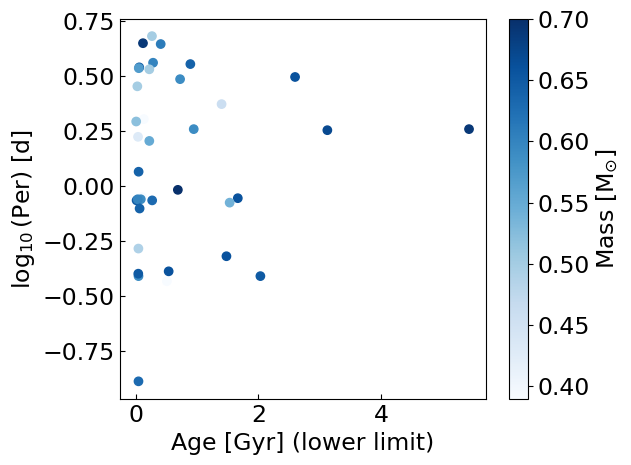

In [106]:
plt.scatter(df['age_est'], np.log10(df['Per']),  c= df['reMass'], cmap = 'Blues')

plt.xlabel('Age [Gyr] (lower limit)')
plt.ylabel(r'$\log_{10}(\mathrm{Per})\ [\rm{d}]$')
plt.colorbar(label = r'$\rm{Mass}\ [M_{\odot}]$')
plt.tight_layout()
plt.tick_params(direction = 'in'
               )

plt.savefig('../../plots/presentation/age_mass_bins.png', dpi= 250)
plt.show()

In [224]:
df.info()

<Table length=37>
         name          dtype      unit                                     description                                   n_bad
--------------------- ------- ----------- ------------------------------------------------------------------------------ -----
          main_01_oid   int32                                                                          Object Identifier     0
     main_non_rep_oid   int32                                                                          Object Identifier     0
            source_id   int64                                                                                                0
                 Mass float32     solMass                                                           Mass of the star (4)     5
                  Per float64           d                                                    Rotation period of the star     0
                  Rad float32      solRad                                                    

In [230]:
df.columns

<TableColumns names=('main_01_oid','main_non_rep_oid','source_id','Mass','Per','Rad','ra','dec','ruwe','reference','logAge','SpType','Lstar','rv_amplitude_robust','ipd_frac_multi_peak','parallax','pm','pmra','pmdec','phot_g_mean_mag','bp_rp','radial_velocity','radial_velocity_error','ruwe_2','ruwe_f','ipd_f','rv_robust_old_bin','rv_amp_f','abs_Mag','reMass','parallax_error','pmra_error','pmdec_error','re_v_z','re_v_z_error','age_est','is_in_wds')>

source_id,Mass,Per,Rad,ra,dec,ruwe,reference,rv_amplitude_robust,ipd_frac_multi_peak,parallax,pm,pmra,pmdec,phot_g_mean_mag,bp_rp,radial_velocity,radial_velocity_error,ruwe_f,ipd_f,rv_amp_f,abs_Mag,reMass,parallax_error,pmra_error,pmdec_error,re_v_z,re_v_z_error,age_est,is_in_wds
,solMass,d,solRad,deg,deg,,,km / s,,mas,mas / yr,mas / yr,mas / yr,mag,mag,km / s,km / s,,,,,,mas,mas / yr,mas / yr,,,,
int64,float32,float64,float32,float64,float64,float64,object,float32,int16,float64,float32,float64,float64,float32,float32,float32,float32,int64,int64,int64,float64,float64,float32,float32,float32,float64,float64,float64,int64
700357227214999296,0.37,0.37,0.39,141.21117,30.69285,1.191,Newton17,43.488373,0,31.48790021209892,198.0609,-100.6276142794498,-170.59368263173135,12.296038,2.6087093,16.319973,3.4797094,0,0,0,9.786756176131949,0.39,0.0282501,0.025457522,0.021215247,-13.752346760578174,1.7385040745822544,0.5100784913607785,0
3241952369992171904,0.68,4.44,0.71,77.83086,7.90891,1.152999997138977,Kounkel,2.6562538,0,17.427507387186957,57.201317,57.14144078463892,-2.6165742404915218,10.759151,1.473258,43.98511,0.29879838,0,0,0,6.965327836228763,0.69,0.018653851,0.021666093,0.016247697,5.346376698527262,0.04182907835659299,0.12072480842922366,0
5335418042562387456,0.64,3.57,0.67,176.78129,-60.35621,0.9670000076293945,Kounkel,10.464988,0,11.13612812342512,26.032045,14.210741961725846,-21.811056704605875,12.3362665,1.6679459,15.962098,0.7759046,0,0,0,7.569937612348227,0.64,0.011422299,0.011681804,0.010724976,-18.45119149723714,0.6874342349353727,0.8926638698568854,0
1966340348578305280,0.65,3.45,0.68,323.10276,41.0578,1.25,Kounkel,16.97768,0,8.296332150298477,63.557606,53.07961933810516,34.958878123515845,12.991943,1.836935,-17.231949,0.9290446,0,0,0,7.5863740146563385,0.64,0.014329556,0.012352283,0.012998461,3.705165726064063,0.6116558527827002,0.0600852524504088,0
6080888605477526528,0.54,4.78,0.55,199.94226,-50.49654,1.1490000486373901,Kounkel,101.213036,0,13.943956545414588,23.156023,21.544516535677637,-8.48735455398944,13.0828495,2.3681087,16.736225,6.6152864,0,0,0,8.804779605963269,0.5,0.01633804,0.013974434,0.011650917,-14.86772501228027,5.074780210234196,0.26704824483206424,0
1996239368272403200,--,1.16,0.69,345.56327,53.08383,1.034000039100647,Kounkel,71.278915,0,9.835202103500896,83.55814,77.99814553468089,29.970861773232798,12.575913,1.6710882,-10.134175,35.377148,0,0,0,7.539829872567225,0.64,0.012023443,0.011227194,0.010559613,0.45442592343601995,28.278415262975404,0.04946484991304285,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100076868439605632,0.24,1.96,0.24,286.21191,39.16256,1.053,Wright,58.745567,0,12.051895449259412,40.622368,39.642943869740286,8.866448653200178,13.24949,2.1043577,-4.4677143,2.835519,0,0,0,8.654766561707216,0.52,0.0097791795,0.010087103,0.011569172,-0.15743181277095725,1.8018152923621105,0.010000000000000005,0
